# Data Analysis based on Flowers102 Database

## Import Packages

In [ ]:
from torchvision.datasets import CelebA, Flowers102
import torch
import json
import matplotlib.pyplot as plt

In [ ]:
# Transform
import torchvision.transforms as transforms
from torchvision.transforms import v2

In [ ]:
def flowers102_transform():
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to a common size (adjust as needed)
        transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally for data augmentation
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # ImageNet mean and standard deviation
    ])
    target_transform = None  # You can define a target transform if needed
    return transform, target_transform

## Download Dataset

In [ ]:
root_data_path = '/content/'

transform, target_transform = flowers102_transform()

train_dataset = Flowers102(root=root_data_path, split='train',
                                   transform=None, target_transform=target_transform, download=True)

val_dataset = Flowers102(root=root_data_path, split='val',
                            transform=None, download=False)
# https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

In [ ]:
label_names = {"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia", "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon", "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula", "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", "77": "passion flower", "51": "petunia"}

In [ ]:
label_names.keys()

dict_keys(['21', '3', '45', '1', '34', '27', '7', '16', '25', '26', '79', '39', '24', '67', '35', '32', '10', '6', '93', '33', '9', '102', '14', '19', '100', '13', '49', '15', '61', '31', '64', '68', '63', '69', '62', '20', '38', '4', '86', '101', '42', '22', '2', '54', '66', '70', '85', '99', '87', '5', '92', '28', '97', '57', '40', '47', '59', '48', '55', '36', '91', '29', '71', '90', '18', '98', '8', '30', '17', '52', '84', '12', '11', '96', '23', '50', '44', '53', '72', '65', '80', '76', '37', '56', '60', '82', '58', '75', '41', '95', '43', '83', '78', '88', '94', '81', '74', '89', '73', '46', '77', '51'])

In [ ]:
label_names['10']

'globe thistle'

In [ ]:
transforms_v2 = v2.Compose([
    v2.ToTensor(),
    v2.RandomResizedCrop(size=(128, 128), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


## Visualization of original dataset and augmented dataset

In [ ]:
def visualize_data(data_type='original'):
    # Calculate the number of rows and columns for the grid
    num_images = 12
    cols = 4
    rows = (num_images + cols - 1) // cols

    # Create a figure to display images
    figure = plt.figure(figsize=(8, 8))

    for i in range(1, num_images + 1):
        sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
        img, label = train_dataset[sample_idx]
        # print(img)
        if str(label) in label_names:
            figure.add_subplot(rows, cols, i)
            plt.title(label_names[str(label)])
            plt.axis("off")
            # print(img.shape)
            if data_type=='original':
                plt.imshow(img)
                plt.savefig(f"{num_images}_sample_images_original.png")
            else:
                plt.imshow(transforms_v2(img).permute(1, 2, 0))
                plt.savefig(f"{num_images}_sample_images_augmentated.png")




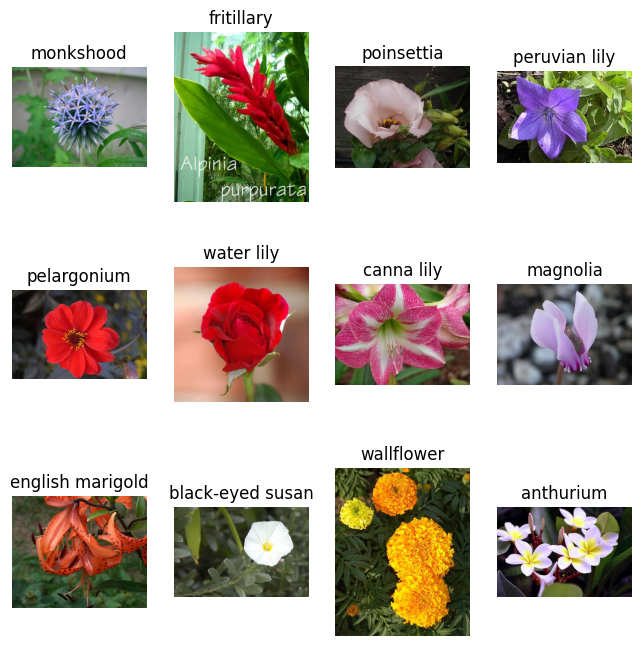

In [ ]:
# show original dataset
visualize_data()

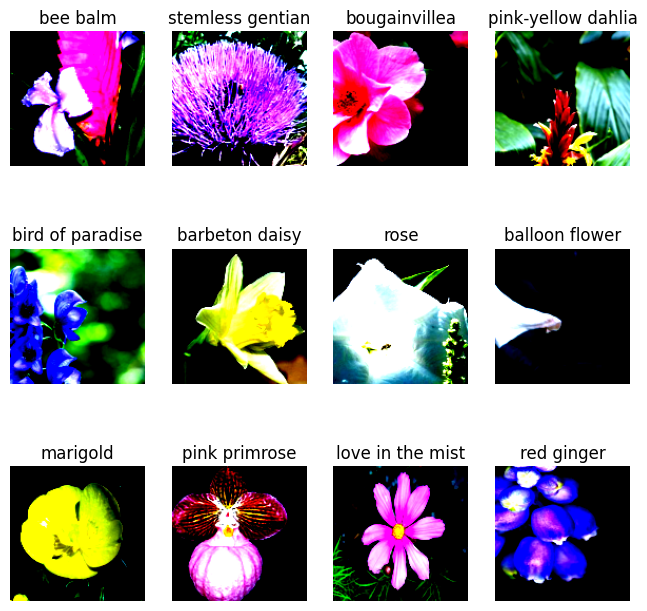

In [ ]:
# show augmented dataset
visualize_data('augmentated')

## Check the balance of the dataset

In [ ]:
def check_dataset_balance(dataset):
    labels = []
    for image, label in dataset:
        labels.append(label)

    distribution_labels = torch.bincount(torch.tensor(labels))

    return distribution_labels

print("number of images in each class in train dataset\n",check_dataset_balance(train_dataset))
print(" ")
print("number of images in each class in validation dataset \n",check_dataset_balance(val_dataset))

In [ ]:
len(train_dataset), len(val_dataset)

## Future
Training a deep learning model on a dataset with only 10 images per class can be challenging due to the limited amount of data available. However, there are several strategies we can consider to make the most of your small dataset:


*   Transfer learning
*   Data Augementation
*   Likelihood Matching: Use techniques like likelihood matching or contrastive divergence to match the likelihood of the data distribution. These techniques can stabilize training and help with small datasets.
*   Use simple models






In [ ]:
from torch._C import dtype
dummy_transforms_v2 = v2.Compose([
    v2.ToImagePIL(),
    # v2.RandomResizedCrop(size=(128, 128), antialias=True),
    # v2.RandomHorizontalFlip(p=0.5),
    # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dummy_transform = transforms.Compose([
        transforms.ToPILImage(),  # Resize images to a common size (adjust as needed)
        # transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally for data augmentation
        # transforms.ToTensor(),  # Convert images to PyTorch tensors
        # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # ImageNet mean and standard deviation
    ])


dummy_image = torch.randint(low=0, high=255, size=(3,128,128))
dummy_image = dummy_image.float()

dummy_transformed_img = dummy_transform(dummy_image)
print(dummy_transformed_img.getpixel((20, 20)))